### Remember the steps...

In [1]:
# get data
# clean data, dropping any rows and columns that need to be dropped (1)
# select features (could postpone this)
# X/y split
# Train/Test split
# split both Train and Test in numericals and categoricals


# transformations on numericals:
#     fit ONLY on numericals_train
#     transform BOTH numericals_train and numericals_test
# encoding categoricals
#     fit ONLY on categricals_train
#     encode BOTH categoricals_train and categoricals_test
# combine (concatenate) numericals_train and categoricals_train into train_processed (array or ?dataframe)
# combine numericals_test and categoricals_test into test_processed (array or ?dataframe)


# define model
# fit (train) model on train_processed
# evaluate (score) model on test_processed (only real evaluation of model can be done on test data)
#up to you to decide which transformations are appropriate

# save model and transformers/encoders (2)

#you use the same preparation up until the point where you choose the model you want to use (logistic, KNN or linear regression, etc)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics


In [3]:
#data = pd.read_csv('df_cleaned.csv')
data = pd.read_csv('df_cleaned.csv', index_col=[0])
data

,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance
0,No,Air Miles,Letter,High,1,No,High,2,0,4,No,1160.75
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,No,Air Miles,Letter,Medium,2,No,High,1,0,4,No,1219.00
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17971,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50
17972,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50
17973,No,Cash Back,Letter,High,1,No,Low,2,0,4,No,1087.25
17974,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25


In [4]:
data.dtypes

offer_accepted           object
reward                   object
mailer_type              object
income_level             object
#_bank_accounts_open      int64
overdraft_protection     object
credit_rating            object
#_credit_cards_held       int64
#_homes_owned             int64
household_size            int64
own_your_home            object
average_balance         float64
dtype: object

In [6]:
data.describe()
#average_balance has very large range, $48-3366, will need to do scaling

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,1.255730,1.903427,0.779929,3.499110,940.515562
std,0.472405,0.797086,0.670681,1.114476,350.297837
min,1.000000,1.000000,0.000000,1.000000,48.250000
25%,1.000000,1.000000,0.000000,3.000000,787.500000
50%,1.000000,2.000000,1.000000,3.000000,1007.000000
75%,1.000000,2.000000,1.000000,4.000000,1153.250000
max,3.000000,4.000000,3.000000,9.000000,3366.250000


### X/Y Split

In [5]:
y = data['offer_accepted']  #categorical 
X = data.drop(['offer_accepted'], axis = 1) # 5 numericals, 6 categoricals

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [16]:
X_train.shape

(14380, 11)

In [163]:
X_train.head(5)

,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance
11164,Cash Back,Letter,High,1,No,Medium,3,2,3,Yes,659.00
16015,Air Miles,Letter,Low,2,No,Low,2,0,2,No,1049.50
10706,Cash Back,Letter,High,1,No,Low,1,2,4,Yes,1066.25
12590,Points,Postcard,Medium,1,No,Low,2,2,2,Yes,939.75
12274,Cash Back,Letter,Medium,1,No,Low,2,2,5,Yes,311.50


In [17]:
X_test.shape

(3596, 11)

In [62]:
y_train.head(10)  #offer_accepted is being shown, it's the target 

11164     No
16015     No
10706     No
12590     No
12274     No
17800    Yes
15963     No
7854      No
6787      No
16702     No
17344     No
12628     No
4539     Yes
2902      No
13258     No
2851     Yes
1364      No
808       No
1987      No
12086     No
3896      No
9177      No
7158      No
16155     No
10701     No
6085      No
15619     No
4371      No
14749     No
82        No
Name: offer_accepted, dtype: object

### Analyze extracted features and transform them.¶
May need to encode some categorical variables, or scale numerical variables.

In [124]:
#Splitting X_train into numerical and categorical and then transforming numericals

X_train_num = X_train.select_dtypes(include = np.number)


#Using min/max scaler for X_train

#transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
#X_train_normalized = transformer.transform(X_train_num)
#X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
0,0.0,0.666667,0.666667,0.250,0.210585
1,0.5,0.333333,0.000000,0.125,0.345229
2,0.0,0.000000,0.666667,0.375,0.351004
3,0.0,0.333333,0.666667,0.125,0.307387
4,0.0,0.333333,0.666667,0.500,0.090768
...,...,...,...,...,...
14375,0.0,0.333333,0.333333,0.375,0.310232
14376,0.0,0.666667,0.000000,0.250,0.075597
14377,0.5,0.666667,0.333333,0.375,0.045686
14378,0.0,0.666667,0.000000,0.125,0.297388


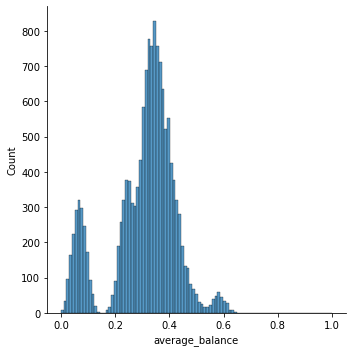

In [42]:
#It's possible to deal with discrete and continous numerical features differently, but let's not here. 
#Only continuous numerical variable is average_balance

#Does average_balance have a normal distribution?... kind of..see below

sns.displot(X_train_norm['average_balance'])
plt.show() 

#### Next step is to treat categoricals

#### One-hot encoding:
    
reward

mailer type

overdraft protection

own your home



#### Ordinal encoding:
    
income level

credit rating

In [21]:
X_categoricals_train= X_train.select_dtypes(object)  #splitting categoricals out of X_train
X_categoricals_test= X_test.select_dtypes(object) #splitting categoricals out of X_test
X_categoricals_train.head(10) #can see has same index as X_train 

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
11164,Cash Back,Letter,High,No,Medium,Yes
16015,Air Miles,Letter,Low,No,Low,No
10706,Cash Back,Letter,High,No,Low,Yes
12590,Points,Postcard,Medium,No,Low,Yes
12274,Cash Back,Letter,Medium,No,Low,Yes
17800,Air Miles,Postcard,Medium,No,Medium,No
15963,Cash Back,Postcard,Medium,No,Low,Yes
7854,Cash Back,Letter,Low,No,Medium,No
6787,Cash Back,Postcard,High,No,Low,Yes
16702,Points,Postcard,Low,No,Low,Yes


In [23]:
#separating out the categorical features from the X_train which are for one-hot encoding
one_hot_columns = X_categoricals_train[['reward', 'mailer_type', 'overdraft_protection', 'own_your_home']]
one_hot_columns

,reward,mailer_type,overdraft_protection,own_your_home
11164,Cash Back,Letter,No,Yes
16015,Air Miles,Letter,No,No
10706,Cash Back,Letter,No,Yes
12590,Points,Postcard,No,Yes
12274,Cash Back,Letter,No,Yes
...,...,...,...,...
5534,Points,Postcard,No,Yes
16322,Cash Back,Postcard,No,No
5307,Cash Back,Postcard,No,Yes
7985,Points,Letter,No,No


In [117]:
encoder = OneHotEncoder(drop='first').fit(one_hot_columns) 
encoded = encoder.transform(one_hot_columns).toarray()
encoded_columns = OneHotEncoder(drop='first').fit(one_hot_columns).get_feature_names_out(input_features=one_hot_columns.columns) 
#this allows us to get the columns names for our encoded array

X_train_cat_one_hot = pd.DataFrame(encoded, columns = encoded_columns)
X_train_cat_one_hot.head(5)

,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0


In [25]:
ordinal_coded_columns = X_categoricals_train[['income_level', 'credit_rating']]
ordinal_coded_columns

,income_level,credit_rating
11164,High,Medium
16015,Low,Low
10706,High,Low
12590,Medium,Low
12274,Medium,Low
...,...,...
5534,High,High
16322,High,High
5307,Medium,High
7985,Low,Medium


In [28]:
X_categoricals_train['income_level'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [30]:
X_categoricals_train["income_level"] = X_categoricals_train["income_level"].map({"Low": 0, "Medium": 1, "High": 2})

In [31]:
X_categoricals_train['credit_rating'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [32]:
X_categoricals_train['credit_rating'] = X_categoricals_train['credit_rating'].map({"Low": 0, "Medium": 1, "High": 2})

In [33]:
X_categoricals_train

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
11164,Cash Back,Letter,2,No,1,Yes
16015,Air Miles,Letter,0,No,0,No
10706,Cash Back,Letter,2,No,0,Yes
12590,Points,Postcard,1,No,0,Yes
12274,Cash Back,Letter,1,No,0,Yes
...,...,...,...,...,...,...
5534,Points,Postcard,2,No,2,Yes
16322,Cash Back,Postcard,2,No,2,No
5307,Cash Back,Postcard,1,No,2,Yes
7985,Points,Letter,0,No,1,No


In the original X_categoricals_train dataframe, 2 features have been ordinal encoded.


In the X_train_cat_one_hot dataframe, 4 features have been one-hot encoded.


Now, I need to put the one_hot encoded features into the X_categoricals_train data frame


This will be a dataframe with all categorical variables encoded in training set. 

In [37]:
X_categoricals_train_ordinals = X_categoricals_train.drop(['reward','mailer_type', 'overdraft_protection', 'own_your_home'], axis=1)
X_categoricals_train_ordinals

,income_level,credit_rating
11164,2,1
16015,0,0
10706,2,0
12590,1,0
12274,1,0
...,...,...
5534,2,2
16322,2,2
5307,1,2
7985,0,1


In [119]:
X_categoricals_train_ordinals.head()

X_categoricals_train_ordinals = X_categoricals_train_ordinals.reset_index()
X_categoricals_train_ordinals
#I reset the index here but still has other index? 


,index,income_level,credit_rating
0,11164,2,1
1,16015,0,0
2,10706,2,0
3,12590,1,0
4,12274,1,0
...,...,...,...
14375,5534,2,2
14376,16322,2,2
14377,5307,1,2
14378,7985,0,1


In [168]:
X_categoricals_train_ordinals = X_categoricals_train_ordinals.drop(['index'], axis=1)

X_categoricals_train_ordinals

,income_level,credit_rating
0,2,1
1,0,0
2,2,0
3,1,0
4,1,0
...,...,...
14375,2,2
14376,2,2
14377,1,2
14378,0,1


In [121]:
X_train_cat_one_hot
#can see the indexes are now the same between one hot and ordinal

,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14375,0.0,1.0,1.0,0.0,1.0
14376,1.0,0.0,1.0,0.0,0.0
14377,1.0,0.0,1.0,0.0,1.0
14378,0.0,1.0,0.0,0.0,0.0


In [169]:
X_categoricals_train_transformed = np.concatenate([X_categoricals_train_ordinals, X_train_cat_one_hot], axis=1)

X_categoricals_train_transformed #holds all encoded categorical variables in training set

array([[2., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [2., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 2., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 2., 1., ..., 0., 0., 0.]])

In [170]:
#Concatenate both dataframes (numerical and categorical) for X_train
#now we need a table that has both the X_train categorical_encoded, and
#the X_train numerical features that have been normalized using min/max scaler
X_train_processed = np.concatenate([X_train_norm, X_categoricals_train_transformed], axis=1,)


X_train_processed = pd.DataFrame(X_train_processed)
X_train_processed   #this is all the training data encoded and scaled!! 

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.666667,0.666667,0.250,0.210585,2.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.5,0.333333,0.000000,0.125,0.345229,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.666667,0.375,0.351004,2.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.333333,0.666667,0.125,0.307387,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,0.333333,0.666667,0.500,0.090768,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14375,0.0,0.333333,0.333333,0.375,0.310232,2.0,2.0,0.0,1.0,1.0,0.0,1.0
14376,0.0,0.666667,0.000000,0.250,0.075597,2.0,2.0,1.0,0.0,1.0,0.0,0.0
14377,0.5,0.666667,0.333333,0.375,0.045686,1.0,2.0,1.0,0.0,1.0,0.0,1.0
14378,0.0,0.666667,0.000000,0.125,0.297388,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [44]:
# split Test in numericals and categoricals
X_numericals_test = X_test.select_dtypes(np.number)
X_categoricals_test = X_test.select_dtypes(object)
X_numericals_test

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
10794,1,1,0,4,1132.50
14580,2,2,0,2,1050.25
3763,2,1,1,3,1042.75
11274,2,3,0,4,1073.25
14886,1,2,1,4,1049.50
...,...,...,...,...,...
7693,1,2,1,2,666.00
10931,1,1,0,3,308.75
154,2,1,1,4,1454.75
9637,1,4,1,2,1394.50


In [45]:
X_categoricals_test

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
10794,Cash Back,Letter,Medium,No,Medium,No
14580,Cash Back,Letter,Medium,No,Medium,No
3763,Points,Letter,Low,Yes,High,Yes
11274,Cash Back,Postcard,Medium,No,Low,No
14886,Cash Back,Postcard,Medium,Yes,Low,Yes
...,...,...,...,...,...,...
7693,Points,Letter,Medium,No,Low,Yes
10931,Points,Letter,High,No,High,No
154,Air Miles,Letter,Low,No,Low,Yes
9637,Cash Back,Letter,High,No,Low,Yes


In [47]:
#Using min/max scaler for X_test using the same transformer from the X_train above

#Splitting X_test numericals
X_test_num = X_test.select_dtypes(np.number)

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm.head(10)

,#_bank_accounts_open,#_credit_cards_held,#_homes_owned,household_size,average_balance
0,0.0,0.000000,0.000000,0.375,0.373847
1,0.5,0.333333,0.000000,0.125,0.345487
2,0.5,0.000000,0.333333,0.250,0.342901
3,0.5,0.666667,0.000000,0.375,0.353418
4,0.0,0.333333,0.333333,0.375,0.345229
5,0.0,0.000000,0.333333,0.250,0.337902
6,0.5,0.666667,0.333333,0.250,0.454961
7,0.0,0.333333,0.000000,0.250,0.031290
8,0.0,0.666667,0.333333,0.000,0.406861
9,0.0,0.000000,0.000000,0.375,0.446168


In [46]:
X_categoricals_test #made this above already when building train 

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
10794,Cash Back,Letter,Medium,No,Medium,No
14580,Cash Back,Letter,Medium,No,Medium,No
3763,Points,Letter,Low,Yes,High,Yes
11274,Cash Back,Postcard,Medium,No,Low,No
14886,Cash Back,Postcard,Medium,Yes,Low,Yes
...,...,...,...,...,...,...
7693,Points,Letter,Medium,No,Low,Yes
10931,Points,Letter,High,No,High,No
154,Air Miles,Letter,Low,No,Low,Yes
9637,Cash Back,Letter,High,No,Low,Yes


In [48]:
one_hot_columns_test = X_categoricals_test[['reward', 'mailer_type', 'overdraft_protection', 'own_your_home']]
one_hot_columns_test

,reward,mailer_type,overdraft_protection,own_your_home
10794,Cash Back,Letter,No,No
14580,Cash Back,Letter,No,No
3763,Points,Letter,Yes,Yes
11274,Cash Back,Postcard,No,No
14886,Cash Back,Postcard,Yes,Yes
...,...,...,...,...
7693,Points,Letter,No,Yes
10931,Points,Letter,No,No
154,Air Miles,Letter,No,Yes
9637,Cash Back,Letter,No,Yes


In [100]:
#X_test_cat_one_hot = pd.get_dummies(one_hot_columns_test, 
                             columns=['reward', 'mailer_type', 'overdraft_protection', 'own_your_home'],
                             drop_first=True)
#X_test_cat_one_hot.head()

,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
10794,1,0,0,0,0
14580,1,0,0,0,0
3763,0,1,0,1,1
11274,1,0,1,0,0
14886,1,0,1,1,1


In [126]:
#using same encoder as above during train set!! 

encoded = encoder.transform(one_hot_columns_test).toarray()
encoded_columns = OneHotEncoder(drop='first').fit(one_hot_columns_test).get_feature_names_out(input_features=one_hot_columns_test.columns) 
X_test_cat_one_hot = pd.DataFrame(encoded, columns = encoded_columns)
X_test_cat_one_hot

#X_test_cat_one_hot now holds test set one hot encoded categorical features

,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...
3591,0.0,1.0,0.0,0.0,1.0
3592,0.0,1.0,0.0,0.0,0.0
3593,0.0,0.0,0.0,0.0,1.0
3594,1.0,0.0,0.0,0.0,1.0


In [ ]:
#Next step-- ordinal encode the income_level and credit_rating in the test set

In [52]:
X_categoricals_test['income_level'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [53]:
X_categoricals_test["income_level"] = X_categoricals_test["income_level"].map({"Low": 0, "Medium": 1, "High": 2})

In [54]:
X_categoricals_test['credit_rating'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [55]:
X_categoricals_test["credit_rating"] = X_categoricals_test["credit_rating"].map({"Low": 0, "Medium": 1, "High": 2})

In [128]:
X_categoricals_test_ordinals = X_categoricals_test.drop(['reward','mailer_type', 'overdraft_protection', 'own_your_home'], axis=1)

X_categoricals_test_ordinals = X_categoricals_test_ordinals.reset_index()

X_categoricals_test_ordinals = X_categoricals_test_ordinals.drop(['index'], axis=1)
X_categoricals_test_ordinals


,income_level,credit_rating
0,1,1
1,1,1
2,0,2
3,1,0
4,1,0
...,...,...
3591,1,0
3592,2,2
3593,0,0
3594,2,0


In [129]:
X_categoricals_test_transformed = np.concatenate([X_categoricals_test_ordinals, X_test_cat_one_hot], axis=1)


X_categoricals_test_transformed #holds all encoded categorical variables in test set

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [2., 0., 1., ..., 0., 0., 1.],
       [0., 2., 1., ..., 1., 0., 1.]])

In [130]:
#Concatenate both dataframes (numerical and categorical transformed) for X_test
#now we need a table that has both the X_test categoricalencoded, and
#the X_test numerical features that have been normalized using min/max scaler
X_test_processed = np.concatenate([X_test_norm, X_categoricals_test_transformed], axis=1)

X_test_processed = pd.DataFrame(X_test_processed)
X_test_processed   #here we have a dataframe with all the test data encoded and scaled!

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.000000,0.000000,0.375,0.373847,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.5,0.333333,0.000000,0.125,0.345487,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.5,0.000000,0.333333,0.250,0.342901,0.0,2.0,0.0,1.0,0.0,1.0,1.0
3,0.5,0.666667,0.000000,0.375,0.353418,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.333333,0.333333,0.375,0.345229,1.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3591,0.0,0.333333,0.333333,0.125,0.212999,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3592,0.0,0.000000,0.000000,0.250,0.089820,2.0,2.0,0.0,1.0,0.0,0.0,0.0
3593,0.5,0.000000,0.333333,0.375,0.484958,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3594,0.0,1.000000,0.333333,0.125,0.464184,2.0,0.0,1.0,0.0,0.0,0.0,1.0


In [171]:
X_train_processed

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.666667,0.666667,0.250,0.210585,2.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.5,0.333333,0.000000,0.125,0.345229,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.666667,0.375,0.351004,2.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.333333,0.666667,0.125,0.307387,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,0.333333,0.666667,0.500,0.090768,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14375,0.0,0.333333,0.333333,0.375,0.310232,2.0,2.0,0.0,1.0,1.0,0.0,1.0
14376,0.0,0.666667,0.000000,0.250,0.075597,2.0,2.0,1.0,0.0,1.0,0.0,0.0
14377,0.5,0.666667,0.333333,0.375,0.045686,1.0,2.0,1.0,0.0,1.0,0.0,1.0
14378,0.0,0.666667,0.000000,0.125,0.297388,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Imbalanced Data (only check this in the X_train_processed)

Significant imbalance, majority class is quite high (number of 0s-- people who did NOT take the credit card offer)

In [ ]:
#First, put X_train_processed and y_train_processed together into a dataframe
#Second, count the majority/minority classes
#Do upsample, downsample and SMOTE, decide which is most important: recall, precision, or f2 score,
#choose the technique that yields the best score for the most important metric 

In [ ]:
#next steps...prepare the targets, deal with imbalanced data, and define the model! 

#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
#For a binary regression, the factor level 1 of the dependent variable (target) should represent the desired outcome.
#binary: “1”, means “Yes, offer accepted, “0” means “No, offer rejected”

In [ ]:
#change y_train and y_test Yes/No to 1 and 0 

In [115]:
#reset index first
y_train = y_train.drop(['index'], axis=1)
y_train

,offer_accepted
0,No
1,No
2,No
3,No
4,No
...,...
14375,No
14376,No
14377,No
14378,No


In [134]:
y_train['offer_accepted'] = y_train['offer_accepted'].replace(['No'],0)
y_train['offer_accepted'] = y_train['offer_accepted'].replace(['Yes'],1)
print(y_train['offer_accepted'].dtypes)
y_train
#replace No/Yes with integer value of 0,1 not string! 

int64


,offer_accepted
0,0
1,0
2,0
3,0
4,0
...,...
14375,0
14376,0
14377,0
14378,0


In [145]:
y_test = y_test.replace(['No'],0)
y_test = y_test.replace(['Yes'],1)
print(y_test.dtypes)
y_test
#replace No/Yes with integer value of 0,1 not string! 

int64


10794    0
14580    0
3763     0
11274    0
14886    0
        ..
7693     0
10931    0
154      0
9637     0
15652    0
Name: offer_accepted, Length: 3596, dtype: int64

In [172]:
# oversampling / undersampling /SMOTE is only to be done on the TRAINING set
# our test set still must reflect reality!
train_imbalanced = pd.concat([X_train_processed, y_train],axis=1) #has both values of features and outcome
train_imbalanced.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,offer_accepted
0,0.0,0.666667,0.666667,0.250,0.210585,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0
1,0.5,0.333333,0.000000,0.125,0.345229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.000000,0.666667,0.375,0.351004,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.0,0.333333,0.666667,0.125,0.307387,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0
4,0.0,0.333333,0.666667,0.500,0.090768,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [137]:
#Here we see the imbalance in the training set that we need to treat with upsampling, downsampling, and SMOTE
y_train.value_counts()

offer_accepted
0                 13580
1                   800
dtype: int64

0    13580
1      800
Name: offer_accepted, dtype: int64


<AxesSubplot:>

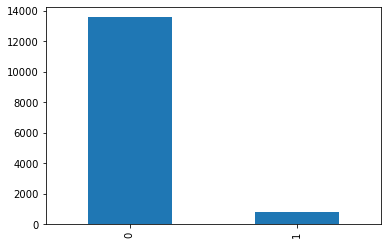

In [147]:
count_classes = train_imbalanced['offer_accepted'].value_counts()
print(count_classes)
count_classes.plot(kind = 'bar')

#### Before dealing with the imbalanced data, let's see how the model runs. 

In [173]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_processed, y_train)
LR.score(X_test_processed, y_test) #r2 score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9385428253615128

In [175]:
#!pip install imblearn
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import resample

In [176]:
pred = LR.predict(X_test_processed)

print("precision: ",precision_score(y_test,pred))
#tells us of the cases where we predicted a 1, how often were we correct? 

print("recall: ",recall_score(y_test,pred))
#out of all the diabetes cases, how many did we identify?

print("f1: ",f1_score(y_test,pred))

precision:  0.0
recall:  0.0
f1:  0.0


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

#So 3375 times our model predicted a No and it was really a No (True Negative)
#221 times we predicted a NO but it was really a yes (False negative)
#0 times we predicted a Yes and it was really a NO (False positive)
#0 times we predicted a Yes and it was really a Yes (True Positive)

array([[3375,    0],
       [ 221,    0]])

In [ ]:
# predicted | 0 | 1 | 
# --------------------------
# actual  0 | + |  | 
# --------------------------
#         1 |   | +


# predicted | 0 | 1 | 
# --------------------------
# actual  0 | TN | FP | 
# --------------------------
#         1 | FN  | TP

#TN= True Negative
#FN = False negative

#TP= True Positive
#FP= False positive

#### Getting the above warning because our model happened to predict 0 Yes, and can't run metrics with 0s 
##### There were actually 3375 No, and 221 yes, but our model predicted  3596 Nos (100% Nos)


Precision = TruePositives / (TruePositives + FalsePositives)

Precision = 0/ (0+0) = ?? Impossible 


Recall = TruePositives / (TruePositives + FalseNegatives)

Recall = 0 / (0 + 0) = ??  Impossible


#### Precision- How many retrieved items were relevant?
Precision tells us of the cases where we predicted a 1 (Yes), how often were we correct? 


#### Recall- How many relevant items were retrieved? 
Recall tells us out of all the Yes (1) cases, how many did we predict? 
The instances of the minority class being correctly predicted


#### F1 is high if both precision and recall are relatively high. 
Use F1 if you can't decide which is more important, precision or recall

##### You want to get accurate prediction of minority classes here, but it depends on your goals and  the realm your analzying to decide which evaluation metric to optimize

In [178]:
y_test.value_counts()

0    3375
1     221
Name: offer_accepted, dtype: int64

In [180]:
print(3375 + 221)
print(3375/3596)   #number of 0s divided by total number of cases

3596
0.9385428253615128


#### Even though the logistic regression model has an r2 score of .94, it's only because our majority/minority classes are deeply imbalanced. So our model can easily predict all the majority class (0s/Nos) , but it isn't capable of predicting a single minority class instance (1s/Yes)! Ouch! 

Ultimately this is problematic because the bank isn't so interested in who doesn't accept and offer and why, because they already know most people probably won't accept a credit card offer (the majority class). It's much more helpful and challenging to be able to predict who does accept and offer and why (minority class), but of course, this may require more data



### So let's finally get on to treating the imbalanced data and see how they each impact our metrics 

First need to separate out the target from the train dataframe, then separate the minority class rows from the majority class rows into 2 dataframes

In [181]:
count_classes = train_imbalanced['offer_accepted'].value_counts()
print(count_classes)

0    13580
1      800
Name: offer_accepted, dtype: int64


In [183]:
from sklearn.utils import resample

category_0 = train_imbalanced[train_imbalanced['offer_accepted'] == 0]   #majority class
category_1 = train_imbalanced[train_imbalanced['offer_accepted'] == 1]   #minority class

In [184]:
print(category_0.shape)
print(category_1.shape)
#so we are going to eliminate category_0 rows so that there are 800 majority and minority class in train 

(13580, 13)
(800, 13)


#### Undersampling starts here

In undersampling, we are making the dataframe fit the number of rows as in the minority class, so eliminating majority class rows

In [186]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))


In [187]:
print(category_0_undersampled.shape)
print(category_1.shape)

(800, 13)
(800, 13)


In [188]:
train_data_undersampled = pd.concat([category_0_undersampled, category_1], axis=0)
#put rows ontop of each other, not next to each other

In [190]:
train_data_undersampled['offer_accepted'].value_counts()


0    800
1    800
Name: offer_accepted, dtype: int64

In [191]:
X_train_undersampled = train_data_undersampled.drop(['offer_accepted'], axis=1)
y_train_undersampled = train_data_undersampled['offer_accepted']


print(X_train_undersampled.shape)
y_train_undersampled.shape

(1600, 12)


(1600,)

#### Now run logistic regression on the undersampled data

In [192]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_undersampled, y_train_undersampled)

In [193]:
predictions = classification.predict(X_test_processed)
predictions
classification.score(X_test_processed, y_test)

0.6754727474972191

In [194]:
pd.Series(predictions).value_counts()


0    2322
1    1274
dtype: int64

In [195]:
print(y_test.value_counts())

0    3375
1     221
Name: offer_accepted, dtype: int64


In [196]:
confusion_matrix(y_test, predictions)

array([[2265, 1110],
       [  57,  164]])

In [198]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_undersampled, y_train_undersampled)
pred = LR.predict(X_test_processed)

print("precision for undersampling is: ",precision_score(y_test,pred))
print("recall for undersampling is: ",recall_score(y_test,pred))
print("f1 for undersampling: ",f1_score(y_test,pred))

precision for undersampling is:  0.12882953652788687
recall for undersampling is:  0.7420814479638009
f1 for undersampling:  0.21954484605087013


In [ ]:
#out of all the Yes cases, we accurately predicted 74% (recall)
#but precision is now very very low 

Precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegative)
f1= 2(Recall*Precision)/(Recall + Precision)

#### Oversampling the minority class

In oversampling, we are making the dataframe fit the number of rows as in the majority class, so augmenting minority class rows

In [199]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))


In [200]:
print(category_0.shape)
print(category_1_oversampled.shape)
#now each category has the same number of rows

(13580, 13)
(13580, 13)


In [201]:
train_data_oversampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [202]:
train_data_oversampled['offer_accepted'].value_counts()

0    13580
1    13580
Name: offer_accepted, dtype: int64

In [203]:
X_train_oversampled = train_data_oversampled.drop(['offer_accepted'], axis=1)
y_train_oversampled = train_data_oversampled['offer_accepted']


print(X_train_oversampled.shape)
y_train_oversampled.shape

(27160, 12)


(27160,)

#### Now run the logistic regression model on the ovesampled dataset

In [204]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_oversampled, y_train_oversampled)

In [205]:
predictions = classification.predict(X_test_processed)
predictions
classification.score(X_test_processed, y_test)

0.6668520578420467

In [206]:
pd.Series(predictions).value_counts()

0    2291
1    1305
dtype: int64

In [207]:
print(y_test.value_counts())

0    3375
1     221
Name: offer_accepted, dtype: int64


In [208]:
confusion_matrix(y_test, predictions)

array([[2234, 1141],
       [  57,  164]])

In [209]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_oversampled, y_train_oversampled)
pred = LR.predict(X_test_processed)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.12576687116564417
recall:  0.7420814479638009
f1:  0.21508196721311476


In [ ]:
#Can see that oversampling and undersampling perform about the same, which is to say... really not that great. 

### SMOTE
Syntheic minority oversampling technique using nearest neighbors of the minority class without copying them
Reinstall scikit learn to version 1.1.0

In [210]:
#!pip install imblearn

#from imblearn.over_sampling import SMOTE


In [216]:
sm = SMOTE(random_state=100,k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_processed,y_train)

In [217]:
X_train_SMOTE.shape

(27160, 12)

In [218]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_processed)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.1310951239008793
recall:  0.7420814479638009
f1:  0.22282608695652173


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [219]:
predictions = classification.predict(X_test_processed)
predictions
classification.score(X_test_processed, y_test)

0.6668520578420467

In [220]:
confusion_matrix(y_test,pred)

array([[2288, 1087],
       [  57,  164]])